In [1]:
import tensorflow as tf
import zipfile,os,shutil
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import urllib.request
import zipfile
import os

url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
zip_file = '/tmp/rockpaperscissors.zip'
urllib.request.urlretrieve(url, zip_file)
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/tmp')
print("Dataset rockpaperscissors telah diunduh dan diekstrak.")

Dataset rockpaperscissors telah diunduh dan diekstrak.


In [3]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [4]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [5]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [6]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [7]:
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [8]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=41,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=27,
    verbose=2
)

Epoch 1/20
41/41 - 32s - loss: 1.1366 - accuracy: 0.4306 - val_loss: 0.8676 - val_accuracy: 0.5556 - 32s/epoch - 777ms/step
Epoch 2/20
41/41 - 20s - loss: 0.7102 - accuracy: 0.7210 - val_loss: 0.4029 - val_accuracy: 0.8681 - 20s/epoch - 490ms/step
Epoch 3/20
41/41 - 17s - loss: 0.3798 - accuracy: 0.8659 - val_loss: 0.2651 - val_accuracy: 0.9051 - 17s/epoch - 404ms/step
Epoch 4/20
41/41 - 20s - loss: 0.2721 - accuracy: 0.8979 - val_loss: 0.2710 - val_accuracy: 0.8958 - 20s/epoch - 494ms/step
Epoch 5/20
41/41 - 15s - loss: 0.2430 - accuracy: 0.9108 - val_loss: 0.2659 - val_accuracy: 0.9201 - 15s/epoch - 375ms/step
Epoch 6/20
41/41 - 16s - loss: 0.1803 - accuracy: 0.9329 - val_loss: 0.1926 - val_accuracy: 0.9340 - 16s/epoch - 383ms/step
Epoch 7/20
41/41 - 16s - loss: 0.1488 - accuracy: 0.9444 - val_loss: 0.1903 - val_accuracy: 0.9340 - 16s/epoch - 385ms/step
Epoch 8/20
41/41 - 17s - loss: 0.1701 - accuracy: 0.9405 - val_loss: 0.2648 - val_accuracy: 0.9190 - 17s/epoch - 426ms/step
Epoch 9/

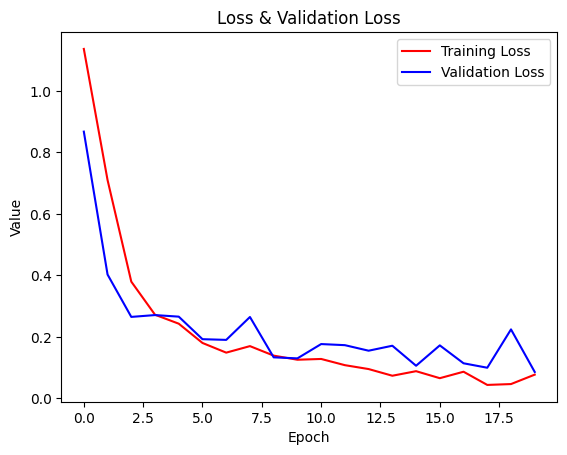

In [13]:
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

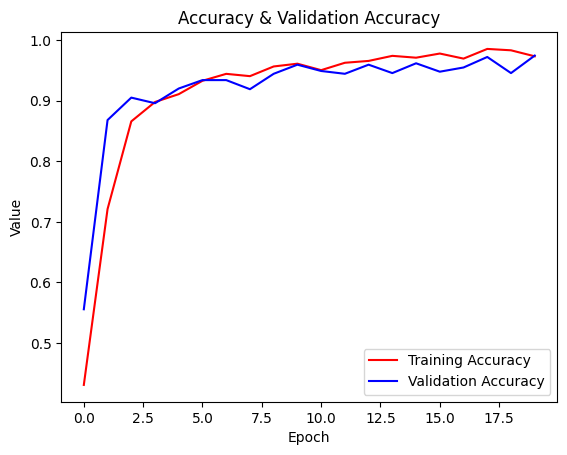

In [14]:
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving batu.png to batu.png
1/1 [==============================] - 0s 332ms/step


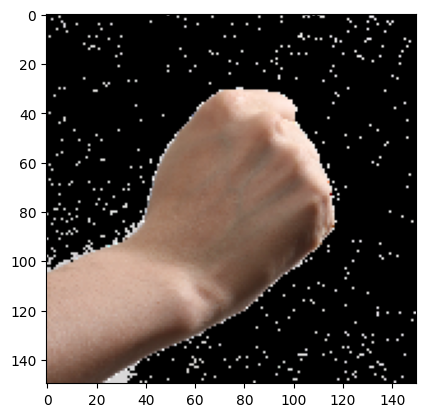

In [15]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [16]:
  print(fn)
  if classes[0,0]!=0:
    print('Gunting')
  elif classes[0,1]!=0:
    print('Batu')
  else:
    print('Kertas')

batu.png
Batu
